In [16]:
from sklearn import datasets
from sklearn import model_selection  
from sklearn import linear_model
from sklearn import metrics
from sklearn import tree
from sklearn import neighbors
from sklearn import svm
from sklearn import ensemble
from sklearn import cluster
from sklearn.preprocessing import OneHotEncoder

import numpy as np
import pandas as pd
# Note: My latest version of Pandas is always showing a FutureWarning. Turning off Warnings for brevity:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from datetime import datetime

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [17]:
cfpb = pd.read_csv('../3_data_cleaned/cfpb_loan_level_LI.csv')
print(cfpb.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47252 entries, 0 to 47251
Data columns (total 52 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         47252 non-null  int64  
 1   activity_year                      47252 non-null  int64  
 2   lei                                47252 non-null  object 
 3   county_code                        47252 non-null  float64
 4   derived_loan_product_type          47252 non-null  object 
 5   derived_dwelling_category          47252 non-null  object 
 6   derived_ethnicity                  47252 non-null  object 
 7   derived_race                       47252 non-null  object 
 8   derived_sex                        47252 non-null  object 
 9   action_taken                       47252 non-null  int64  
 10  purchaser_type                     47252 non-null  int64  
 11  preapproval                        47252 non-null  int

C:\Users\Fefe\AppData\Local\Temp\ipykernel_34444\3106838982.py:1: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  cfpb = pd.read_csv('../3_data_cleaned/cfpb_loan_level_LI.csv')


In [18]:
print(list(cfpb.columns.values))
#['Unnamed: 0', 'activity_year', 'lei', 'county_code', 'derived_loan_product_type', 'derived_dwelling_category', 'derived_ethnicity', 'derived_race', 'derived_sex', 'action_taken', 'purchaser_type', 'preapproval', 'loan_type', 'loan_amount', 'combined_loan_to_value_ratio', 'interest_rate', 'total_loan_costs', 'origination_charges', 'loan_term', 'property_value', 'occupancy_type', 'total_units', 'income', 'debt_to_income_ratio', 'applicant_credit_score_type', 'co_applicant_credit_score_type', 'applicant_ethnicity_1', 'co_applicant_ethnicity_1', 'applicant_ethnicity_observed', 'co_applicant_ethnicity_observed', 'applicant_race_1', 'co_applicant_race_1', 'applicant_race_observed', 'co_applicant_race_observed', 'applicant_sex', 'co_applicant_sex', 'applicant_sex_observed', 'co_applicant_sex_observed', 'applicant_age', 'co_applicant_age', 'applicant_age_above_62', 'submission_of_application', 'initially_payable_to_institution', 'aus_1', 'denial_reason_1', 'tract_population', 'tract_minority_population_percent', 'ffiec_msa_md_median_family_income', 'tract_to_msa_income_percentage', 'tract_owner_occupied_units', 'tract_one_to_four_family_homes', 'tract_median_age_of_housing_units']
# These are the columns for this dataset

['Unnamed: 0', 'activity_year', 'lei', 'county_code', 'derived_loan_product_type', 'derived_dwelling_category', 'derived_ethnicity', 'derived_race', 'derived_sex', 'action_taken', 'purchaser_type', 'preapproval', 'loan_type', 'loan_amount', 'combined_loan_to_value_ratio', 'interest_rate', 'total_loan_costs', 'origination_charges', 'loan_term', 'property_value', 'occupancy_type', 'total_units', 'income', 'debt_to_income_ratio', 'applicant_credit_score_type', 'co_applicant_credit_score_type', 'applicant_ethnicity_1', 'co_applicant_ethnicity_1', 'applicant_ethnicity_observed', 'co_applicant_ethnicity_observed', 'applicant_race_1', 'co_applicant_race_1', 'applicant_race_observed', 'co_applicant_race_observed', 'applicant_sex', 'co_applicant_sex', 'applicant_sex_observed', 'co_applicant_sex_observed', 'applicant_age', 'co_applicant_age', 'applicant_age_above_62', 'submission_of_application', 'initially_payable_to_institution', 'aus_1', 'denial_reason_1', 'tract_population', 'tract_minority_

In [19]:
# Transform categorical columns into a variable
encoder = OneHotEncoder(sparse=False)
X_Cat = encoder.fit_transform(cfpb[['derived_dwelling_category']])
X = np.concatenate((X_Cat, cfpb[['loan_amount']]), axis=1)
y = cfpb.loan_amount
print(X.shape)
print(y.shape)


(47252, 4)
(47252,)


In [20]:
# Split the dataset by 70%
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.7, random_state=0)

In [21]:
# Use a decision tree classifier
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Compare y_pred against y
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

0.9927744354082898
[[ 35   0   0 ...   0   0   0]
 [  0 107   0 ...   0   0   0]
 [  0   0  11 ...   0   0   0]
 ...
 [  0   0   0 ...   0   1   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   1   0]]


c:\Users\Fefe\anaconda3\envs\irisu\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\Users\Fefe\anaconda3\envs\irisu\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Fefe\AppData\Local\Temp\ipykernel_34444\892671376.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


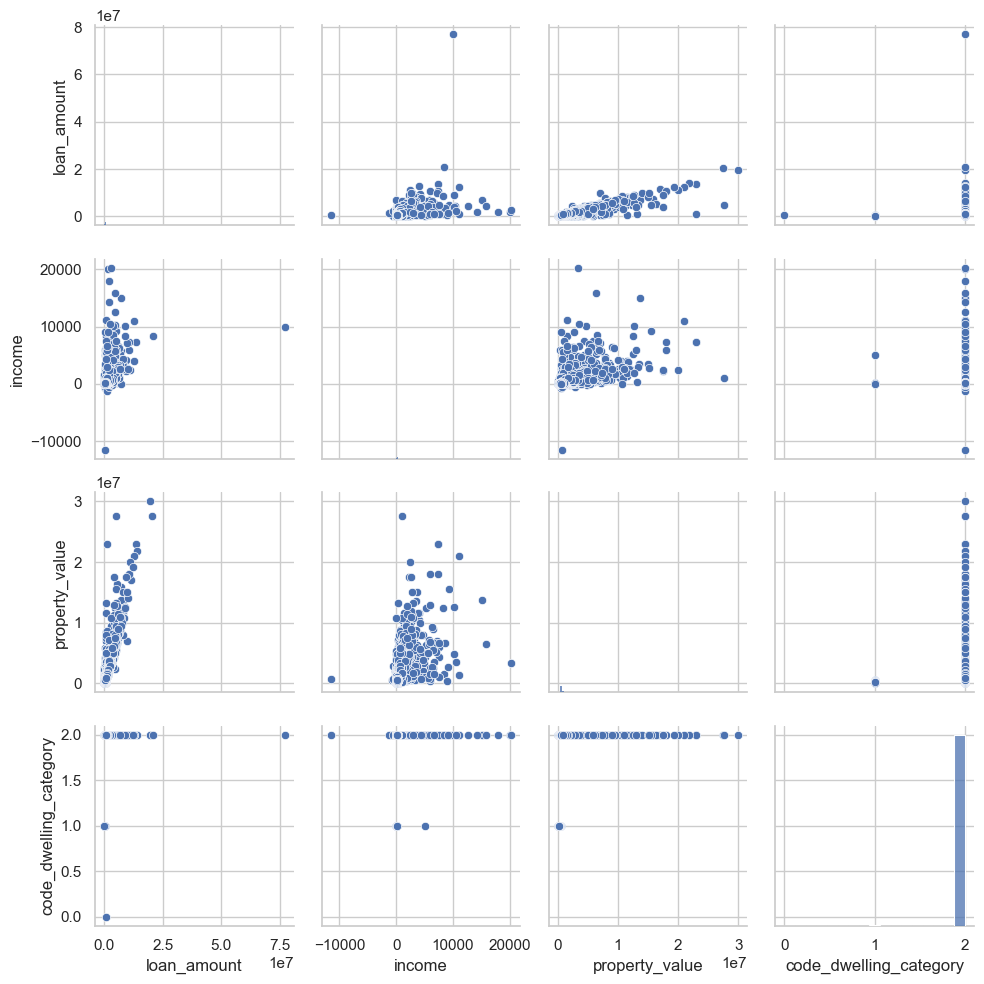

In [22]:
cat_variables = encoder.fit_transform(cfpb[['derived_dwelling_category', 'derived_loan_product_type']])
cats = np.concatenate((cat_variables, cfpb[['derived_dwelling_category', 'derived_loan_product_type']]), axis=1)

sns.set(style='whitegrid', context='notebook')
cols = ['loan_amount', 'income', 'property_value', 'code_dwelling_category']

cfpb['code_dwelling_category'] = cfpb['derived_dwelling_category'].astype('category').cat.codes
cfpb.head()

sns.pairplot(cfpb[cols], size=2.5)
plt.tight_layout()
plt.show()
#test


### Interesting Relations from Above Plots

- Income and Property Value
- Loan amount and Property Value

### Further Data to test

- Action Taken and Property Value
- Action Taken and Preapproval
- debt_to_income_ratio and loan_amount

c:\Users\Fefe\anaconda3\envs\irisu\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


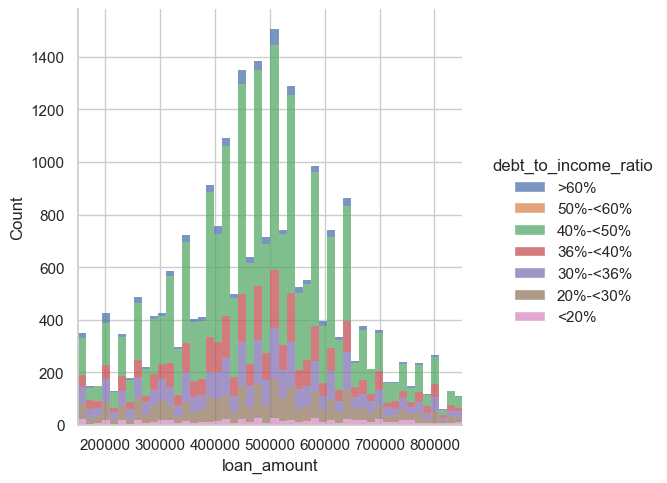

In [23]:
#use sns to scatter plot loan amount vs debt to income ratio
plot = sns.displot(x='loan_amount', hue='debt_to_income_ratio', data=cfpb, multiple="stack",
        hue_order=['>60%', '50%-<60%', '40%-<50%', '36%-<40%', '30%-<36%', '20%-<30%', '<20%'])

plot.set(xlim=(150000, 850000))

c:\Users\Fefe\anaconda3\envs\irisu\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


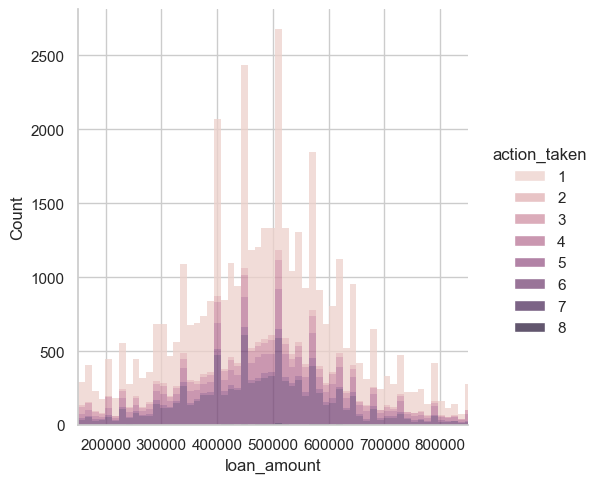

In [25]:
#use sns to scatter plot loan amount vs debt to income ratio
plot = sns.displot(x='loan_amount', hue='action_taken', color='debt_to_income_ratio', data=cfpb, multiple="stack")

plot.set(xlim=(150000, 850000))